In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [4]:
boston_url

'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'

In [43]:
boston_df.tail()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,between 35 and 70 years
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,70 years and older
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,70 years and older
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,70 years and older
505,505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,7.88,11.9,70 years and older


<AxesSubplot:ylabel='MEDV'>

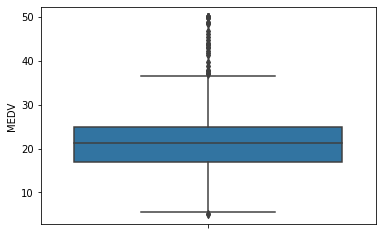

In [18]:
sns.boxplot(y='MEDV', data = boston_df)

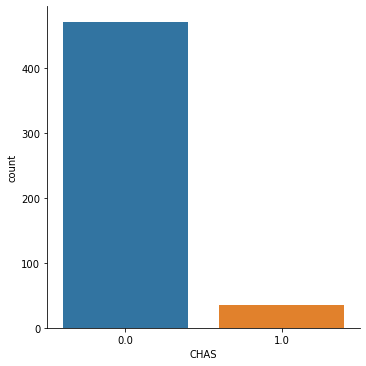

In [25]:
sns.catplot(x='CHAS', kind = 'count', data=boston_df)

<AxesSubplot:xlabel='age_group', ylabel='MEDV'>

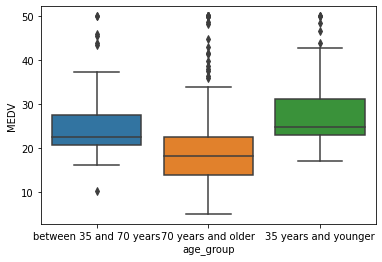

In [35]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

sns.boxplot(x = 'age_group', y='MEDV', data = boston_df)

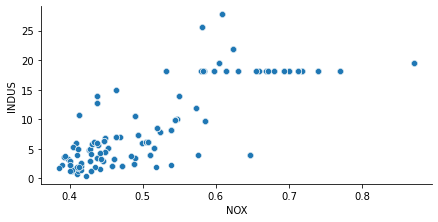

In [36]:
sns.relplot(x="NOX", y="INDUS",
            data=boston_df, height = 3, aspect = 2)

(array([ 15.,   2.,  58.,  15.,  35.,  69.,  76.,  40., 178.,  18.]),
 array([12.6 , 13.54, 14.48, 15.42, 16.36, 17.3 , 18.24, 19.18, 20.12,
        21.06, 22.  ]),
 <BarContainer object of 10 artists>)

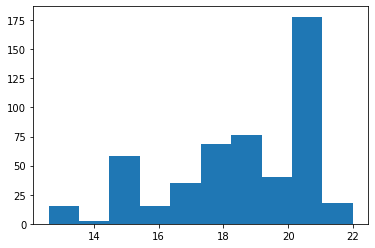

In [38]:
import matplotlib.pyplot as pyplot
pyplot.hist(boston_df['PTRATIO'])

In [44]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? 
#(T-test for independent samples)

# Ho : There is not a significant difference in the median value of the houses bounded by Charles river
# Ha : There is not a significant difference in the median value of the houses bounded by Charles river

scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == '1']['CHAS'],
                   boston_df[boston_df['CHAS'] == '0']['CHAS'], equal_var = True)

Ttest_indResult(statistic=nan, pvalue=nan)

In [51]:
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied 
# units built prior to 1940 (AGE)? (ANOVA)

#Ho = The three population means are equal
#Ha = Atleast one mean is different

boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

#scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
               #    boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                #   boston_df[boston_df['age_group'] == '70 years and olde']['MEDV'], 
                #   center='mean')

a = boston_df[boston_df['age_group'] == '40 years and younger']['MEDV']
b = boston_df[boston_df['age_group'] == 'between 40 and 57 years']['MEDV']
c = boston_df[boston_df['age_group'] == '57 years and older']['MEDV']



f_statistic, p_value = scipy.stats.f_oneway(a,b,c)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: nan, P-Value: nan


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3680: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


In [55]:
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of 
# non-retail business acres per town? (Pearson Correlation)

#𝐻0: there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
#𝐻1: there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Conclusion: Since the p-value < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between beauty and teaching evaluation score.

(0.7636514469209149, 7.913361061240043e-98)

In [57]:
# What is the impact of an additional weighted distance  to the five Boston employment centres on 
# the median value of owner occupied homes? (Regression analysis)

#Ho: There is no impact of additional weighted distance to the five Boston employement centers on the median of
#    of the owner occupied homes

#H1: There is no impact of additional weighted distance to the five Boston employement centers on the median of
#    of the owner occupied homes 

X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

# Conclusion: the p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis 
#             as there is evidence that there is an impact of the weighted distance to the five Boston employment
#             centers o nthe median of owner occupied homes

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 28 Jun 2023   Prob (F-statistic):           1.21e-08
Time:                        00:05:32   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""